In [1]:
'''Question 6: AdaBoost Classifier on Breast Cancer Dataset'''
#Answer

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data [cite: 26]
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost [cite: 30]
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Output [cite: 30]
y_pred = model.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")

AdaBoost Accuracy: 0.9649


In [2]:
'''Question 7: Gradient Boosting Regressor on California Housing'''
#Answer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data [cite: 26]
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Regressor [cite: 34]
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate [cite: 35]
y_pred = model.predict(X_test)
print(f"Gradient Boosting R-squared Score: {r2_score(y_test, y_pred):.4f}")

Gradient Boosting R-squared Score: 0.7756


In [3]:
'''Question 8: XGBoost Classifier with GridSearchCV'''
#Answer

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load data [cite: 42]
data = load_breast_cancer()
X, y = data.data, data.target

# GridSearchCV [cite: 43]
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X, y)

# Output [cite: 44]
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:13:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:13:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:13:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:13:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:13:53] WARNING: /w

Best Parameters: {'learning_rate': 0.3}
Best Accuracy: 0.9684


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


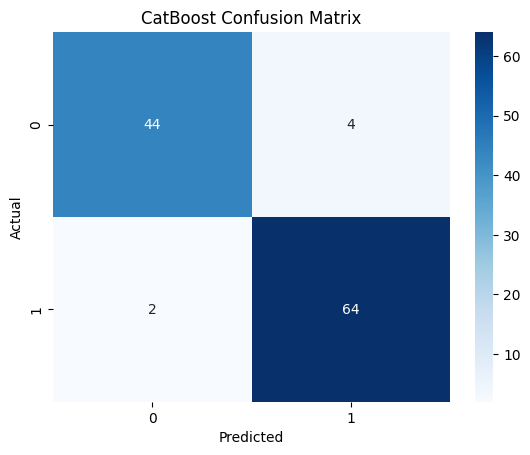

In [5]:
'''Question 9: CatBoost Classifier and Confusion Matrix'''
#Answer

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# Train CatBoost [cite: 48]
model = CatBoostClassifier(iterations=100, verbose=0)
model.fit(X_train, y_train)

# Plot Confusion Matrix [cite: 49]
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()